In [3]:
# load csv file
import pandas as pd
import numpy as np

df = pd.read_csv('heart.csv')
dfO = pd.read_csv('o2Saturation.csv')

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# train Binary Classifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
X = df.drop('output', axis=1)
y = df['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
 
model = LogisticRegression()
model.fit(X_train, y_train)
 
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.819672131147541


c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
model.predict(X_test)

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [5]:
from sklearn.metrics import classification_report
print(accuracy_score(y_test, model.predict(X_test)))
print("Classification report for classifier %s:\n", classification_report(y_test, model.predict(X_test)))
 


0.819672131147541
Classification report for classifier %s:
               precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



In [6]:
# Now we will train it on Perceptron classifier

from sklearn.linear_model import Perceptron, SGDClassifier, PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score
 
# Use LazyPredictor to find the best model
from lazypredict.Supervised import LazyClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models



100%|██████████| 29/29 [00:00<00:00, 31.01it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.80,0.80,0.80,0.80,0.13
LGBMClassifier,0.80,0.80,0.80,0.80,0.08
SGDClassifier,0.79,0.79,0.79,0.79,0.01
QuadraticDiscriminantAnalysis,0.79,0.79,0.79,0.79,0.02
XGBClassifier,0.79,0.79,0.79,0.79,0.09
GaussianNB,0.77,0.77,0.77,0.77,0.01
KNeighborsClassifier,0.77,0.77,0.77,0.77,0.02
NuSVC,0.77,0.77,0.77,0.77,0.02
SVC,0.77,0.77,0.77,0.77,0.01


In [7]:
# Make Ensemble of all the models
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import Perceptron
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
model4 = GaussianNB()
estimators.append(('nb', model4))
model5 = KNeighborsClassifier()
estimators.append(('knn', model5))
model6 = RandomForestClassifier()
estimators.append(('rf', model6))
model7 = AdaBoostClassifier()
estimators.append(('ada', model7))
model8 = GradientBoostingClassifier()
estimators.append(('gb', model8))
model9 = ExtraTreesClassifier()
estimators.append(('et', model9))
model10 = BaggingClassifier()
estimators.append(('bc', model10))
model11 = LinearDiscriminantAnalysis()
estimators.append(('lda', model11))
model12 = QuadraticDiscriminantAnalysis()
estimators.append(('qda', model12))
model13 = Perceptron()
estimators.append(('perceptron', model13))
 
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)

# Predict the test set
y_pred = ensemble.predict(X_test)
 
# Evaluate the model

print(accuracy_score(y_test, y_pred))
print("Classification report for classifier %s:\n", classification_report(y_test, y_pred))

0.819672131147541
Classification report for classifier %s:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80        29
           1       0.80      0.88      0.84        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [8]:
from sklearn.neighbors import KNeighborsClassifier
 
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
modelknn = KNeighborsClassifier()
modelknn.fit(X_train, y_train)

# Predict the test set
y_pred = modelknn.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.639344262295082


In [9]:
# Now we will do k-fold cross validation
from sklearn.model_selection import cross_val_score

# scores = cross_val_score(ensemble, X, y, cv=10)
# print(scores)
# print(scores.mean())

# Now we will do Grid Search to find the best parameters for the model
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [10, 50, 100, 200, 500, 1000],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth' : [4,5,6,7,8],
                # 'criterion' :['gini', 'entropy'],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
                'metric_params': [None, 'distance'],
                'n_jobs': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                'p': [1, 2],
                'weights': ['uniform', 'distance']
                
                }
# 'algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights']
 
CV_rfc = GridSearchCV(estimator=modelknn , param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
 
 
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)
print(CV_rfc.best_estimator_)

ValueError: Invalid parameter 'max_depth' for estimator KNeighborsClassifier(leaf_size=10). Valid parameters are: ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'].

In [ ]:
# Now we will do Randomized Search to find the best parameters for the model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

model = keras.Sequential([
    layers.Dense(13, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(26, activation='relu'),
    # layers.Dense(7, activation='relu'),
    # layers.Dense(4, activation='relu'),
    # layers.Dense(3, activation='relu'),
    # layers.Dense(2, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

# Compile the model with SGD with learning rate 0.01
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
 
 
# define the early stopping callback
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
  
# argmax returns the index of the maximum value in the array
model.fit(X, y, epochs=100, verbose=1, validation_split=0.2, callbacks=[es])
 


Epoch 1/100
8/8 [==============================] - 2s 53ms/step - loss: 24.6101 - accuracy: 0.6818 - val_loss: 58.9628 - val_accuracy: 0.0000e+00
Epoch 2/100
8/8 [==============================] - 0s 15ms/step - loss: 15.1342 - accuracy: 0.6818 - val_loss: 31.6064 - val_accuracy: 0.0000e+00
Epoch 3/100
8/8 [==============================] - 0s 12ms/step - loss: 6.7200 - accuracy: 0.5950 - val_loss: 7.0948 - val_accuracy: 0.1967
Epoch 4/100
8/8 [==============================] - 0s 13ms/step - loss: 5.1213 - accuracy: 0.2851 - val_loss: 5.2269 - val_accuracy: 0.2623
Epoch 5/100
8/8 [==============================] - 0s 11ms/step - loss: 3.6295 - accuracy: 0.3967 - val_loss: 10.6018 - val_accuracy: 0.0656
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 3.3514 - accuracy: 0.5620 - val_loss: 7.8566 - val_accuracy: 0.1148
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 2.7689 - accuracy: 0.4463 - val_loss: 5.4881 - val_accuracy: 0.1639
Epoch 8/1

In [ ]:
#  Now predict the test set
y_pred = model.predict(X)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y, y_pred.round())
print(cm)
print(accuracy_score(y, y_pred.round()))


10/10 [==============================] - 0s 3ms/step
[[ 98  40]
 [ 18 147]]
0.8085808580858086


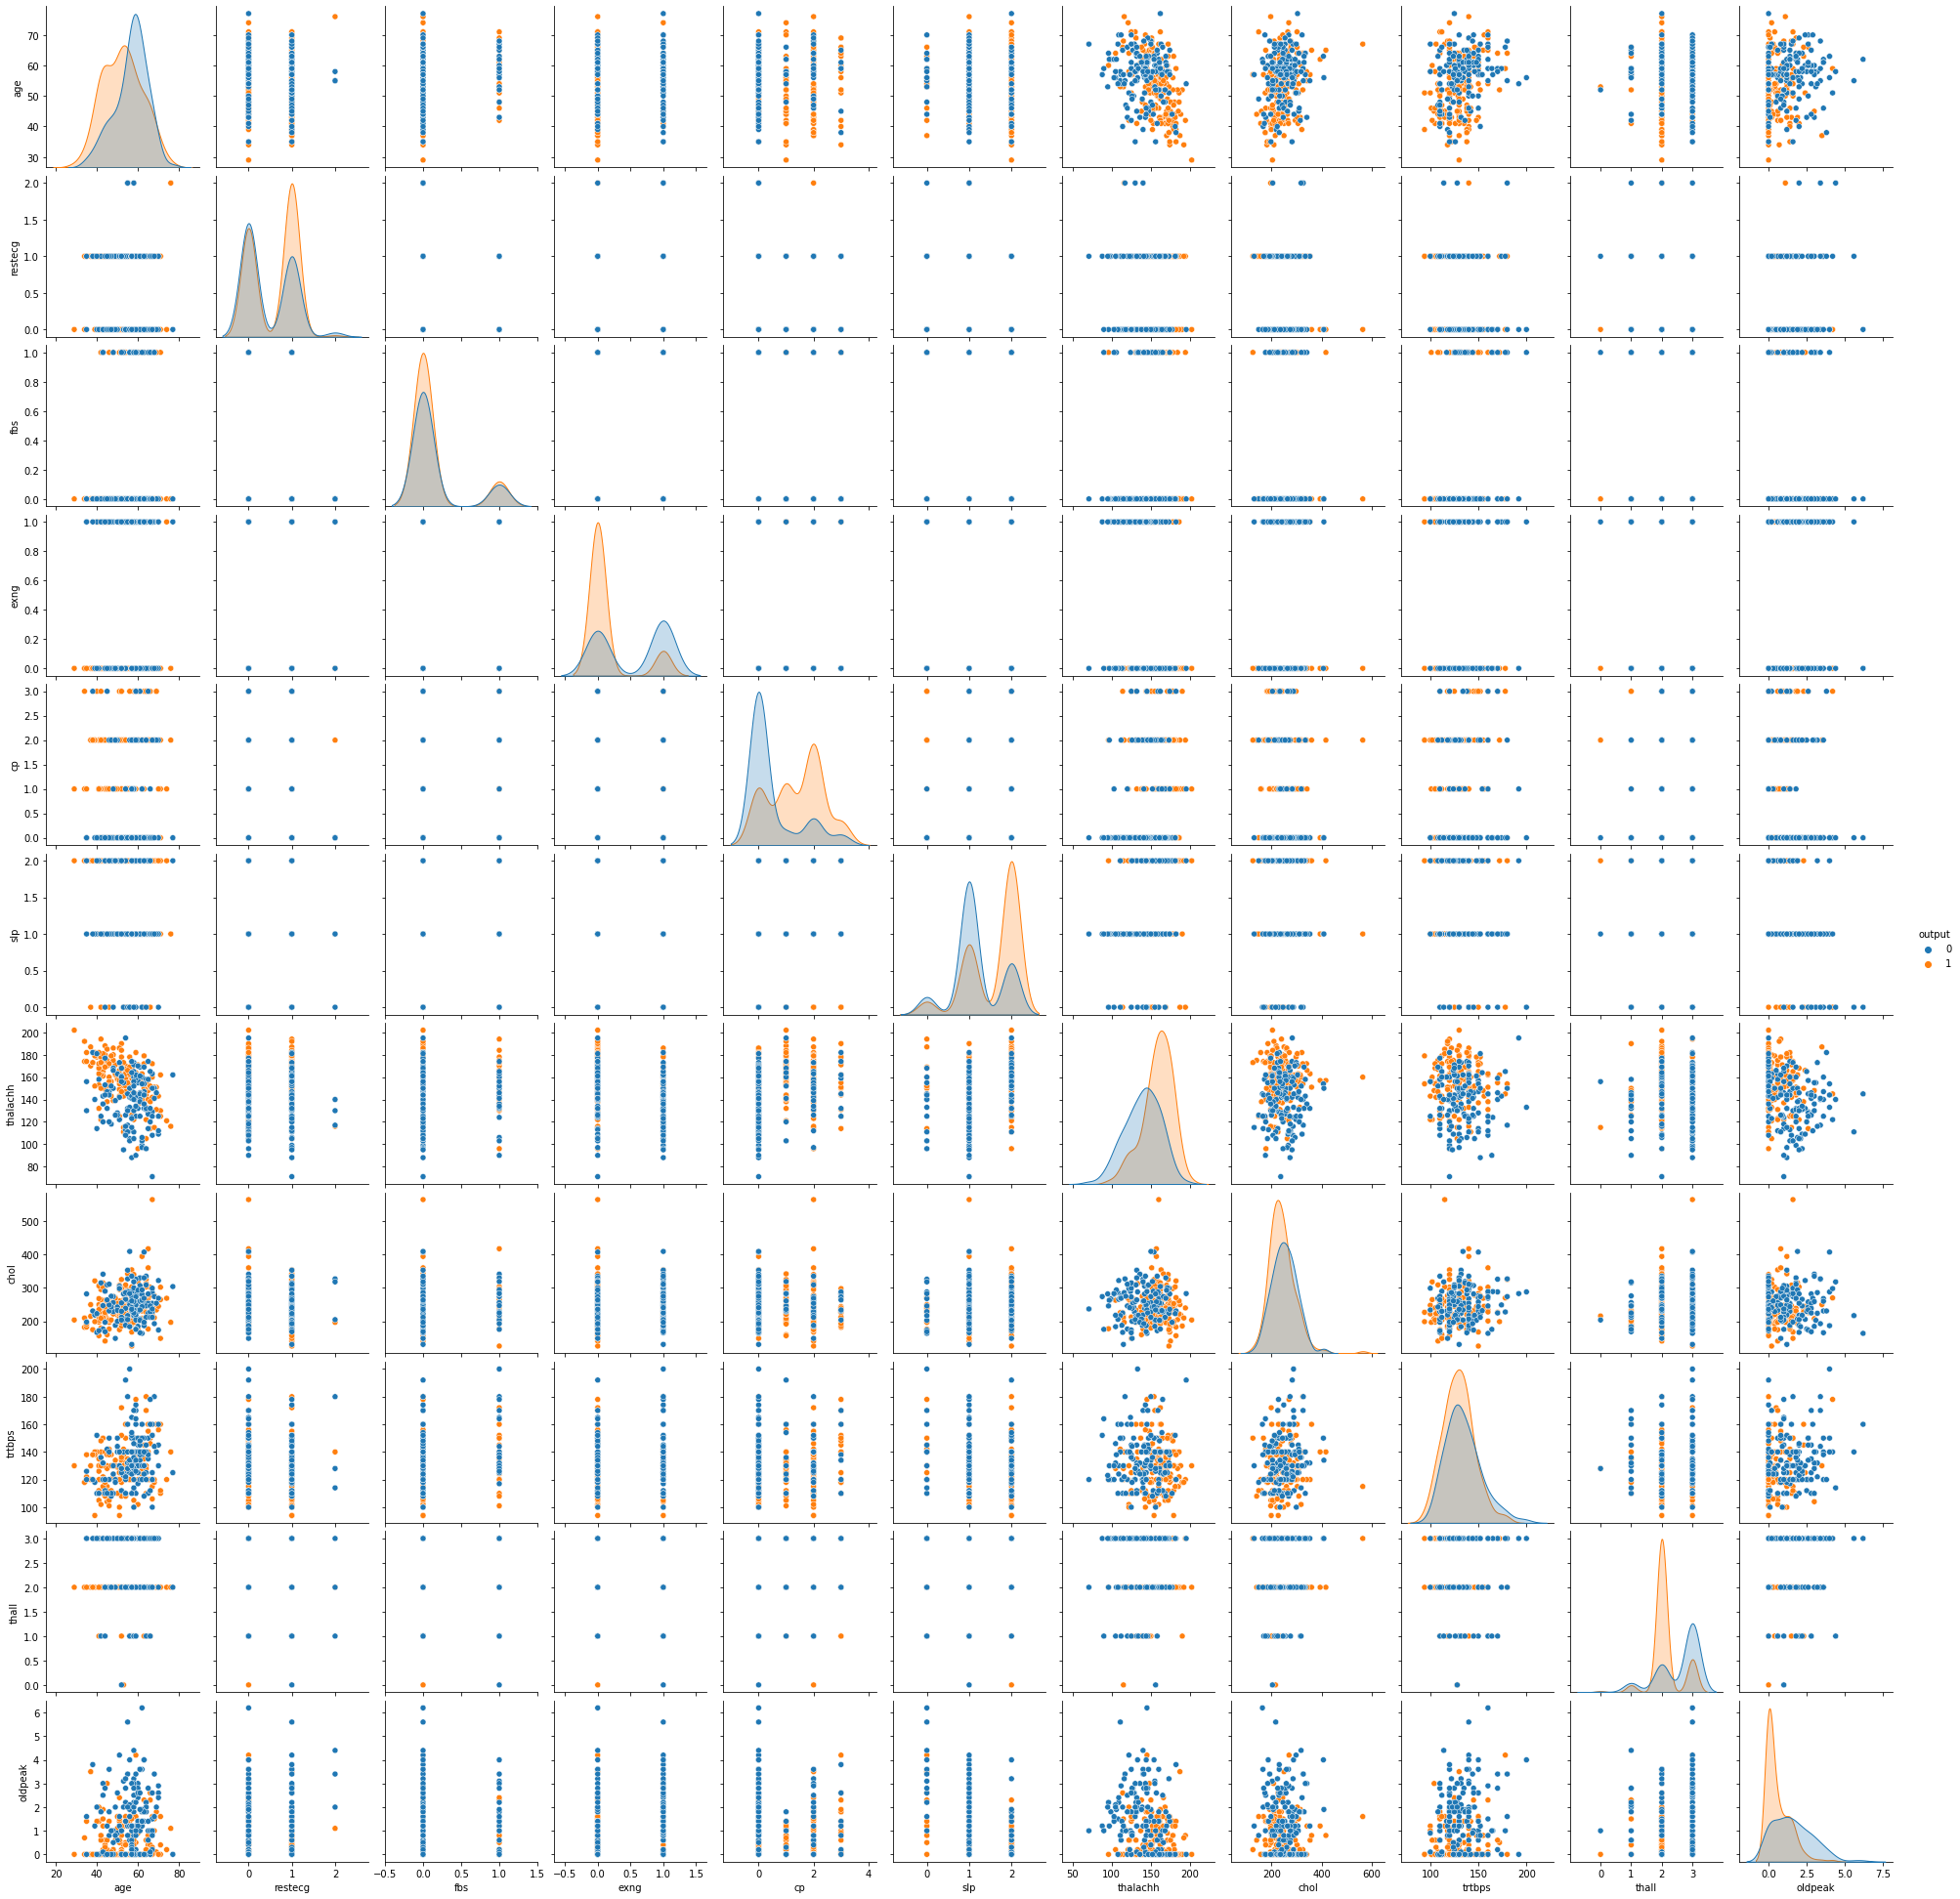

In [ ]:
# visualize the relationship between different features with age

import seaborn as sns
import matplotlib.pyplot as plt
 
sns.pairplot(df, hue='output', vars=['age', 'restecg', 'fbs', 'exng', 'cp', 'slp', 'thalachh', 'chol', 'trtbps', 'thall', 'oldpeak'])
plt.show()
  

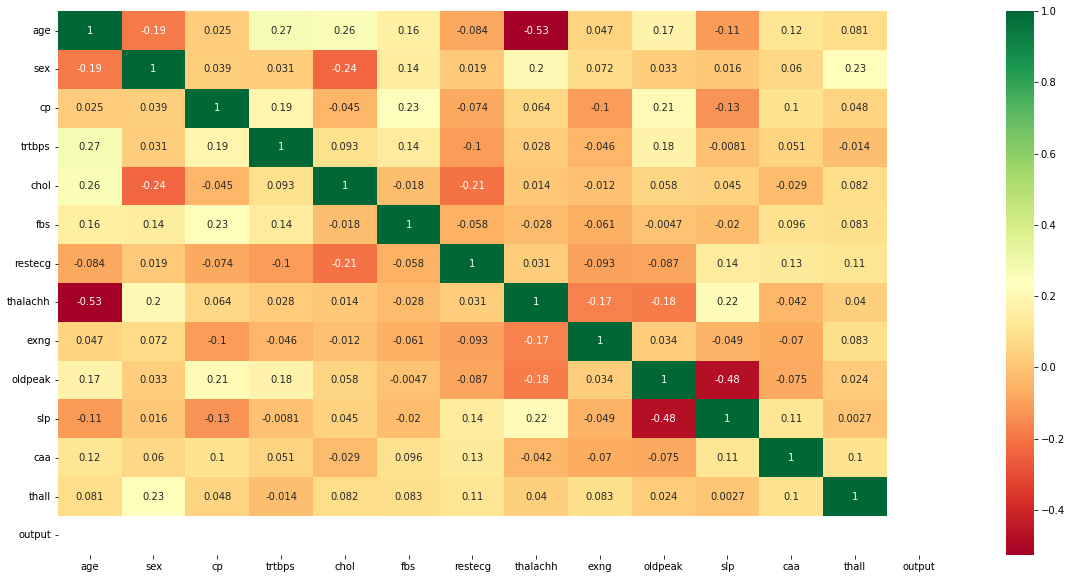

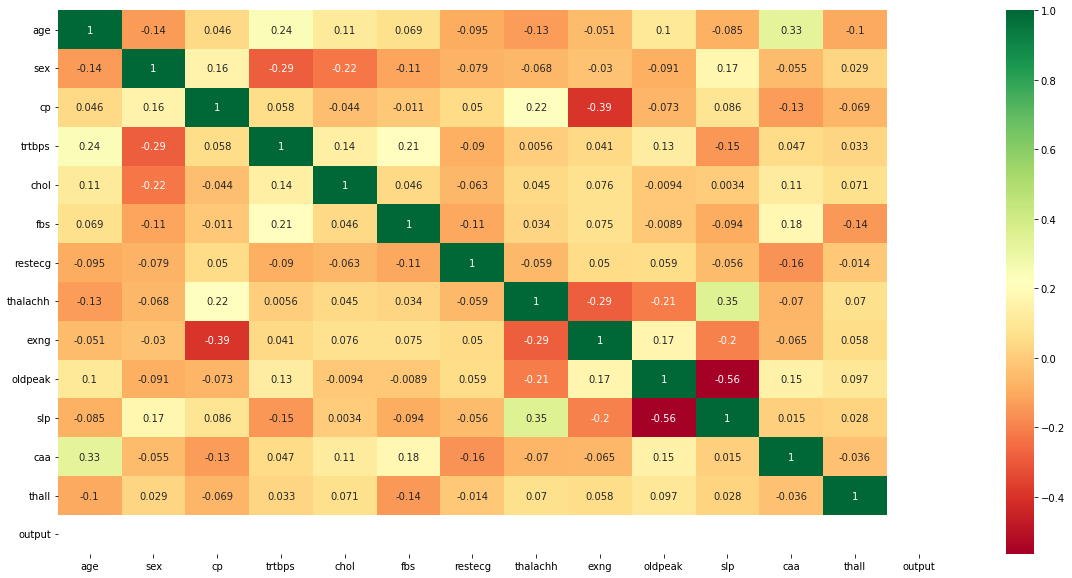

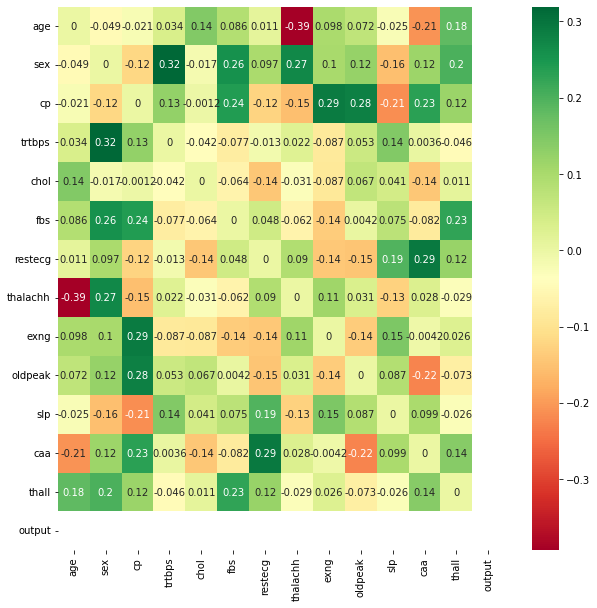

In [5]:
# correlation of age with other features for both output class 1
# and output class 0

# plt.figure(figsize=(20, 10))
# sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
# plt.show()
import seaborn as sns
import matplotlib.pyplot as plt
# for correlation with output 1

plt.figure(figsize=(20, 10))
sns.heatmap(df[df['output']==1].corr(), annot=True, cmap='RdYlGn')
plt.show()


plt.figure(figsize=(20, 10))
sns.heatmap(df[df['output']==0].corr(), annot=True, cmap='RdYlGn' )
plt.show()

# now plot difference in correlation between output 1 and output 0

plt.figure(figsize=(10, 10))
sns.heatmap(df[df['output']==1].corr() - df[df['output']==0].corr(), annot=True, cmap='RdYlGn')
plt.show()

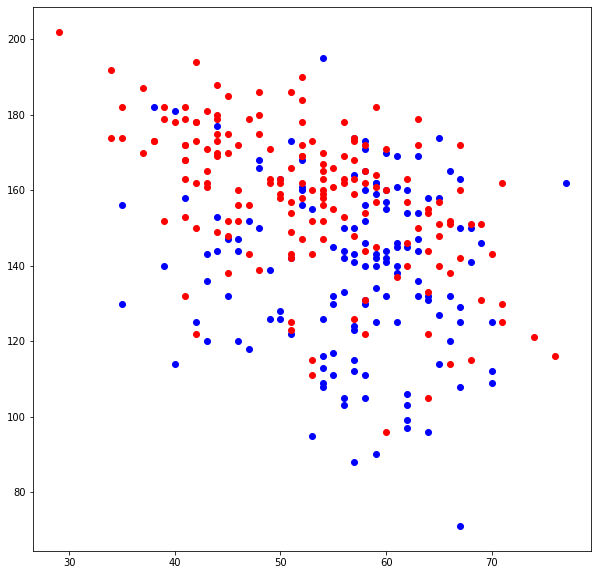

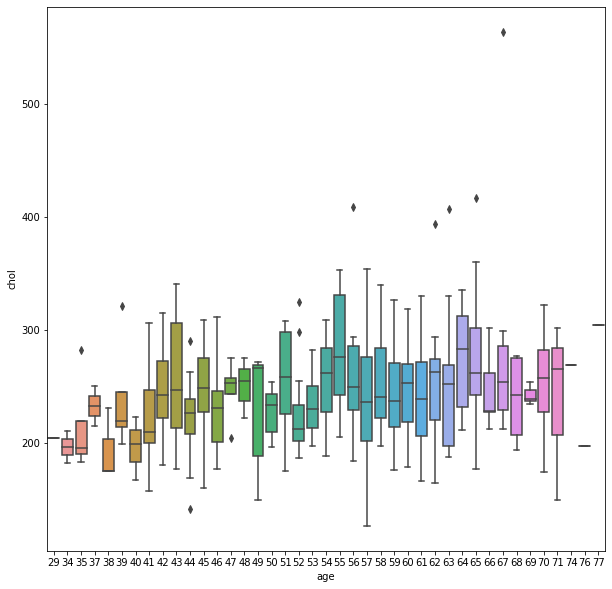

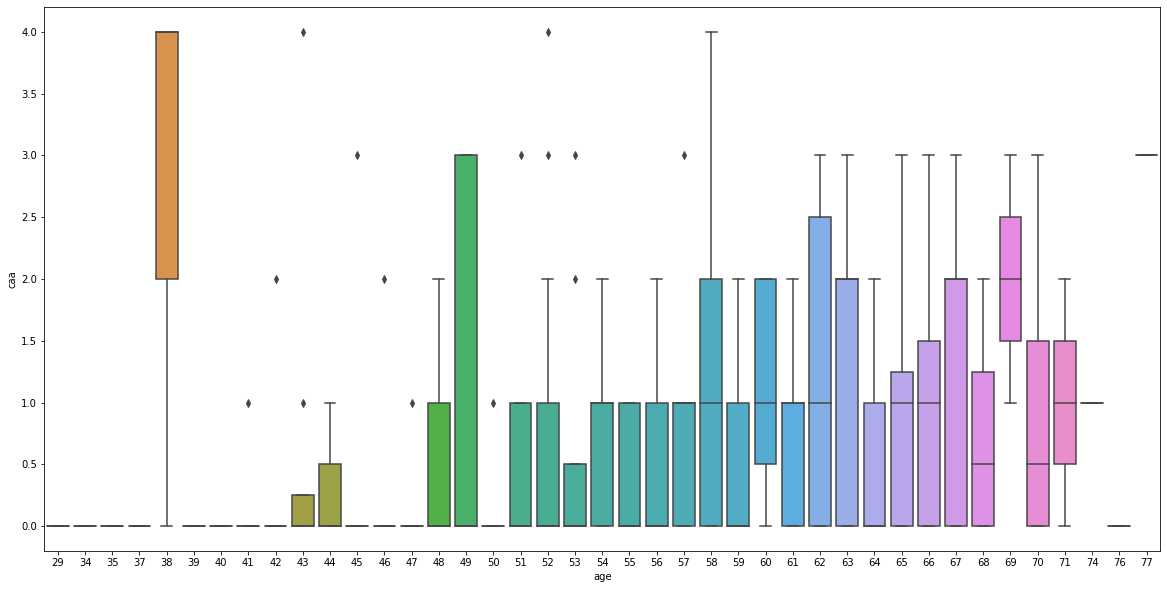

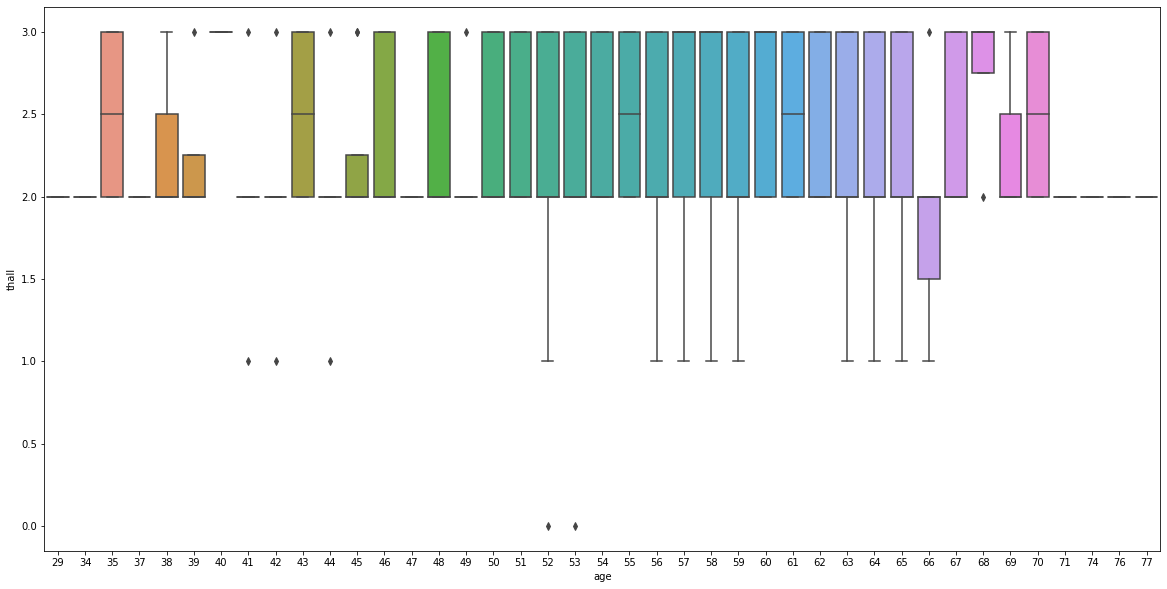

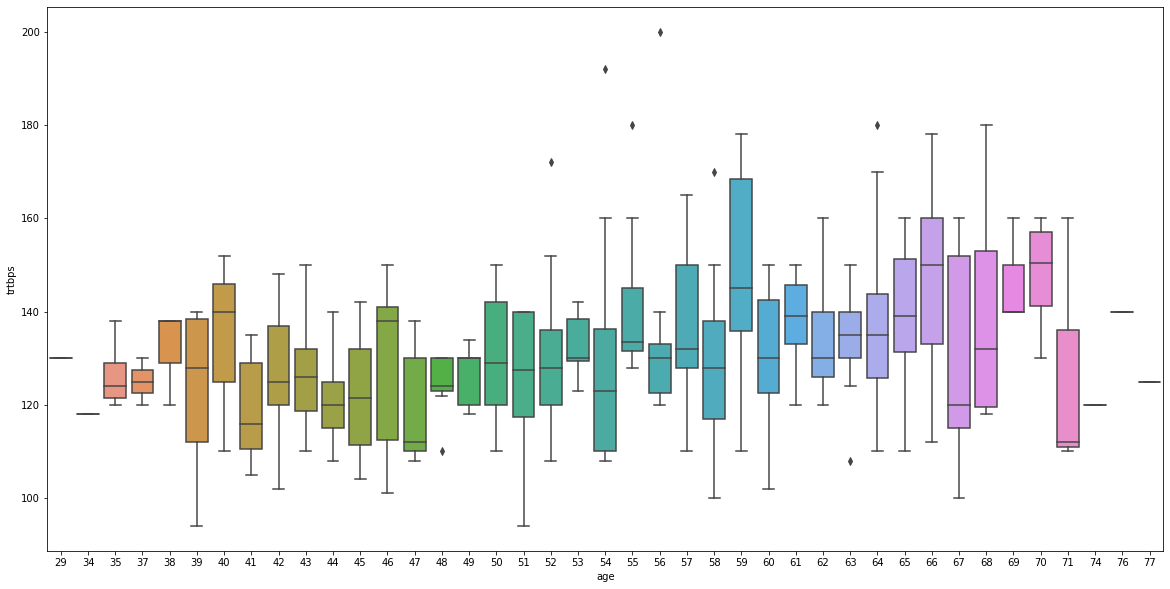

In [ ]:
# plot the distribution of age with thalachh, chol, caa and thall

plt.figure(figsize=(10, 10))
# blue dots if class 0, and red for class 1
# now plot scatter
 
plt.scatter(df[df['output']==0]['age'], df[df['output']==0]['thalachh'], color='blue')
plt.scatter(df[df['output']==1]['age'], df[df['output']==1]['thalachh'], color='red')
plt.show()

plt.figure(figsize=(10, 10))
sns.boxplot(x='age', y='chol', data=df)
plt.show()
 
plt.figure(figsize=(20, 10))
sns.boxplot(x='age', y='caa', data=df)

plt.figure(figsize=(20, 10))
sns.boxplot(x='age', y='thall', data=df)
 
plt.figure(figsize=(20, 10))
sns.boxplot(x='age', y='trtbps', data=df)
plt.show()
